In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

In [5]:
pagedf = pd.read_feather('../data/prophet/pagedf.f')

In [11]:
pagedf.count()

0         550
1         550
2         550
3         550
4         259
5         550
6         185
7         550
8         550
9         550
10        519
11        550
12        550
13        338
14        550
15        550
16        550
17        550
18        550
19        199
20        550
21        550
22        550
23        550
24        186
25        550
26        550
27        507
28        550
29        550
         ... 
145033    158
145034    149
145035    149
145036    147
145037    125
145038    124
145039    117
145040    115
145041    114
145042    110
145043    104
145044     96
145045     96
145046     93
145047     86
145048     82
145049     51
145050     74
145051     55
145052     56
145053     54
145054     35
145055     25
145056     16
145057      3
145058      6
145059      0
145060      0
145061      0
145062      0
Length: 145063, dtype: int64

In [12]:
df = pd.read_feather('../data/prophet/v3/145049df.f')

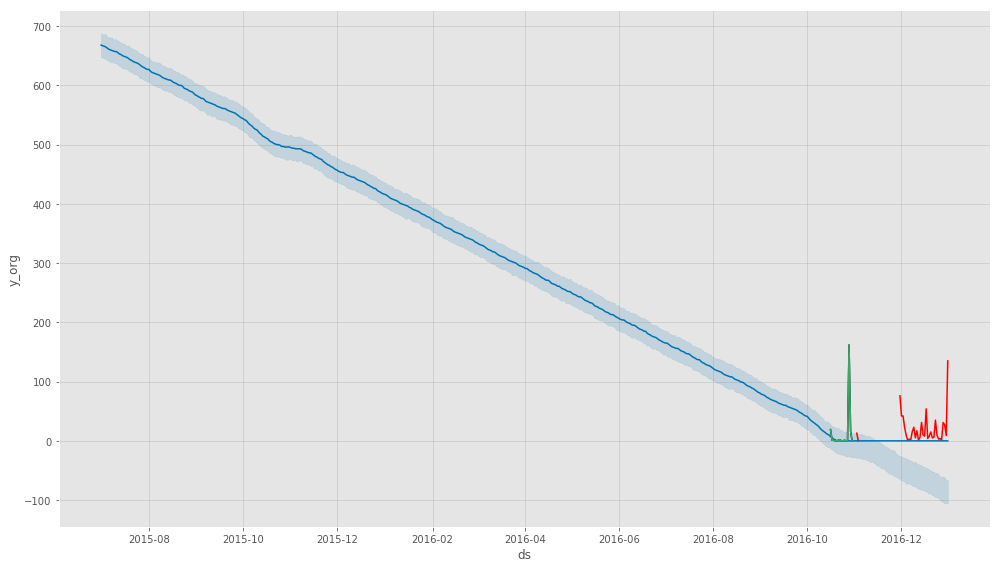

In [16]:
wiki.newphet.prophet_plot(df)

In [14]:
df.y_org

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
       ...  
520     42.0
521     23.0
522     10.0
523      1.0
524      3.0
525      2.0
526     16.0
527     23.0
528      5.0
529     17.0
530      1.0
531      6.0
532     31.0
533     10.0
534      8.0
535     54.0
536      4.0
537      8.0
538     15.0
539      5.0
540      6.0
541     35.0
542     10.0
543      3.0
544      4.0
545      1.0
546     31.0
547     27.0
548      9.0
549    135.0
Name: y_org, Length: 550, dtype: float64

In [15]:
df.yhat

0      668
1      667
2      666
3      665
4      663
5      661
6      660
7      659
8      658
9      657
10     657
11     655
12     653
13     652
14     650
15     649
16     648
17     647
18     645
19     643
20     642
21     640
22     639
23     638
24     637
25     635
26     633
27     631
28     630
29     628
      ... 
520      0
521      0
522      0
523      0
524      0
525      0
526      0
527      0
528      0
529      0
530      0
531      0
532      0
533      0
534      0
535      0
536      0
537      0
538      0
539      0
540      0
541      0
542      0
543      0
544      0
545      0
546      0
547      0
548      0
549      0
Name: yhat, Length: 550, dtype: int64

In [17]:
df.y_org.count()

51

In [18]:
df.yhat.count()

550

In [19]:
wiki.val.smape(df.y_org, df.yhat)

163.24786324786325

In [20]:
wiki.val.smape(df.y_org.fillna(0), df.yhat)

187.13752913752916

In [28]:
def smape(y_true, y_pred):
    # NOTE: should check and make sure that NaNs aren't included
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    print(len(denominator))
    diff = np.abs(y_true - y_pred) / denominator
    print(len(diff))
    diff[denominator == 0] = 0.0
    print(diff.count())
    return np.mean(diff)

In [36]:
def smape_na(y_true, y_pred):
    # NOTE: should check and make sure that NaNs aren't included
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    print(diff.count())
    return np.nanmean(diff)

In [30]:
smape(df.y_org, df.yhat)

550
550
51


163.24786324786325

In [37]:
smape_na(df.y_org, df.yhat)

51


163.24786324786325

In [31]:
np.mean(df.y_org)

17.705882352941178

In [32]:
np.mean(df.y_org.fillna(0))

1.6418181818181818

In [39]:
np.mean(np.array([np.nan,2]))

2.0